## Ujian Akhir Semester Data Mining & Warehouse 2022

#### Nama            : Adinda Salsabilla
#### NIM               : 2005319
#### Kelas             : C2 - 2020
#### Hari/Tanggal  : Selasa / 3 Januari 2023

## Sumber dataset

Data yang digunakan diperoleh dari : https://drive.google.com/file/d/1vv7YjmjVYdlYrm5tmsLbckNQNXi5afMn/view?usp=share_link

## Task

IPM (Indeks Pembangunan Manusia) adalah ukuran kualitas sumber daya manusia. PMI memiliki tiga dimensi: 
1. umur panjang dan hidup sehat (a long and healthy life)
2. pengetahuan (knowledge) 
3. standar hidup layak (decent standard of living).  

PMI dihitung menggunakan data harapan hidup, rata-rata lama sekolah, pengeluaran per kapita.

Asumsikan kategorisasi PMI adalah sebagai berikut:  
- < 60          : sangat rendah; 
- 60 < pmi < 70 : sedang;
- 70 < pmi < 80 : tinggi;
- dan > 80      : sangat tinggi.

Prediksi tingkat PMI per provinsi tanpa menggunakan data yang dapat digunakan untuk menghitung langsung (data proksi). Model ini bermanfaat untuk pengecekan silang dan dapat digunakan jika data yang diperlukan tidak tersedia. 


## Penjelasan Fitur
- jumlah_naik_haji: jumlah jemaah haji yang diberangkatkan ke Tanah Suci Mekah Menurut Provinsi (orang)
- kepadatan_penduduk: kepadatan penduduk (jiwa / km persegi)
- ketidak_cukupan_pangan_prov: Prevalensi ketidakcukupan konsumsi pangan
- melek_huruf_diatas15: angka melek huruf penduduk berumur +15 tahun menurut provinsi (persen). Melek huruf =  dapat membaca dan menulis
- persen_anak_dengan_akte_lahir: persentase anak yang memiliki akta kelahiran menurut provinsi(persen)
- persen_asupan_kalori_bawah_1400: proporsi penduduk dengan asupan kalori minimum di bawah 1400 Kkal/kapita/hari menurut provinsi (persen)
- persen_penduduk_trampil_tik: Proporsi Remaja Dan Dewasa Usia 15-59 Tahun Dengan Keterampilan Teknologi Informasi Dan Komputer (TIK) Menurut Provinsi (Persen)
- persen_perempuan_kerja_manajerial: persentase perempuan yang bekerja menduduki jabatan manajerial per provinsi
- persen_rumah_dgn_fasilitas_cuci_tangan_sabun: Proporsi Rumah Tangga Yang Memiliki Fasilitas Cuci Tangan Dengan Sabun Dan Air Menurut Provinsi (Persen)
- persen_rumah_menyewa: proporsi rumah tangga dengan status kepemilikan rumah sewa/kontrak menurut provinsi
- persen_unmeet_need_pelayanan_kesehatan:Unmet Need Pelayanan Kesehatan Menurut Provinsi (Persen)
- kategori_pmi: kategori PMI tiap provinsi dan tahun  
- proporsi_hidup_dibawah_50_persen_median_pendapatan: proporsi penduduk yang hidup di bawah 50 persen dari median pendapatan, menurut provinsi
- proporsi_kerja_informal_nonpertanian: Proporsi Lapangan Kerja Informal Sektor Non-Pertanian Menurut Provinsi
- proporsi_perempuan_18_24_nikah_prov: Proporsi Perempuan Umur 20-24 Tahun Yang Berstatus Kawin Atau Berstatus Hidup Bersama Sebelum Umur 18 Tahun Menurut Provinsi (Persen)
- proporsi_rt_akses_layanan_dasar: Proporsi rumah tangga dengan akses terhadap pelayanan dasar menurut provinsi (Persen)








## Praproses Dataset

### Import Library

In [1]:
%matplotlib inline
import numpy as np                  
import pandas as pd                 
import matplotlib.pyplot as plt     
import seaborn as sns
import joblib
from datetime import datetime, date

### Load Dataset

In [2]:
#load semua dataset 
df_pmi = pd.read_csv("D:\\datmin\\pmi.csv", sep=";", encoding="utf-8")
df_1   = pd.read_csv("D:\\datmin\\jumlah_naik_haji.csv", sep=";", encoding="utf-8")
df_2   = pd.read_csv("D:\\datmin\\kepadatan_penduduk.csv", sep=";", encoding="utf-8")
df_3   = pd.read_csv("D:\\datmin\\ketidak_cukupan_pangan_prov.csv", sep=";", encoding="utf-8")
df_4   = pd.read_csv("D:\\datmin\\melek_huruf_diatas15.csv", sep=";", encoding="utf-8")
df_5   = pd.read_csv("D:\\datmin\\persen_anak_dengan_akte_lahir.csv", sep=";", encoding="utf-8")
df_6   = pd.read_csv("D:\\datmin\\persen_asupan_kalori_bawah_1400.csv", sep=";", encoding="utf-8")
df_7   = pd.read_csv("D:\\datmin\\persen_penduduk_trampil_tik.csv", sep=";", encoding="utf-8")
df_8   = pd.read_csv("D:\\datmin\\persen_perempuan_kerja_manajerial.csv", sep=";", encoding="utf-8")
df_9   = pd.read_csv("D:\\datmin\\persen_rumah_dgn_fasilitas_cuci_tangan_sabun.csv", sep=";", encoding="utf-8")
df_10  = pd.read_csv("D:\\datmin\\persen_rumah_menyewa.csv", sep=";", encoding="utf-8")
df_11  = pd.read_csv("D:\\datmin\\persen_unmet_need_pelayanan_kesehatan.csv", sep=";", encoding="utf-8")
df_12  = pd.read_csv("D:\\datmin\\proporsi_hidup_dibawah_50_persen_median_pendapatan.csv", sep=";", encoding="utf-8")
df_13  = pd.read_csv("D:\\datmin\\proporsi_kerja_informal_nonpertanian.csv", sep=";", encoding="utf-8")
df_14  = pd.read_csv("D:\\datmin\\proporsi_perempuan_18_24_nikah_prov.csv", sep=";", encoding="utf-8")
df_15  = pd.read_csv("D:\\datmin\\proporsi_rt_akses_layanan_dasar.csv", sep=";", encoding="utf-8")


In [3]:
#menampilkan dataframe PMI (atribut, jumlah non null, dan tipe)
df_pmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prov          442 non-null    object
 1   tahun         442 non-null    int64 
 2   kategori_pmi  442 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.5+ KB


In [4]:
#melihat apakah terdapat value null dalam suatu atribut
df_pmi.isnull().sum()

prov            0
tahun           0
kategori_pmi    0
dtype: int64

In [5]:
#MERGE SEMUA DATASET DENGAN pada prov dan tahun
df_merged_pmi_1 = pd.merge(df_pmi, df_1, how='left', on=['prov', 'tahun'])

df_merged_2_3 = pd.merge(df_2, df_3, how='left', on=['prov', 'tahun'])

df_merged_4_5 = pd.merge(df_4, df_5, how='left', on=['prov', 'tahun'])

df_merged_6_7 = pd.merge(df_6, df_7, how='left', on=['prov', 'tahun'])

df_merged_8_9 = pd.merge(df_8, df_9, how='left', on=['prov', 'tahun'])

df_merged_10_11 = pd.merge(df_10, df_11, how='left', on=['prov', 'tahun'])

df_merged_12_13 = pd.merge(df_12, df_13, how='left', on=['prov', 'tahun'])

df_merged_14_15 = pd.merge(df_14, df_15, how='left', on=['prov', 'tahun'])


# merge ke-2

df_merged2_1 = pd.merge(df_merged_pmi_1, df_merged_2_3, 
                        how='left', on=['prov', 'tahun'])

df_merged2_2 = pd.merge(df_merged_4_5, df_merged_6_7, 
                        how='left', on=['prov', 'tahun'])

df_merged2_3 = pd.merge(df_merged_8_9, df_merged_10_11, 
                        how='left', on=['prov', 'tahun'])

df_merged2_4 = pd.merge(df_merged_12_13, df_merged_14_15, 
                        how='left', on=['prov', 'tahun'])


# merge ke-3

df_merged3_1 = pd.merge(df_merged2_1, df_merged2_2, 
                        how='left', on=['prov', 'tahun'])

df_merged3_2 = pd.merge(df_merged2_3, df_merged2_4, 
                        how='left', on=['prov', 'tahun'])


# merge terakhir

df_merged_all = pd.merge(df_merged3_1, df_merged3_2, 
                        how='left', on=['prov', 'tahun'])

df_merged_all.info()


# membuat file csv

# index=False agar tidak ada tambahkan kolom nomor urut
df_merged_all.to_csv("D:\\datmin\\merged\\merged_all.csv",index=False, sep=";")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 18 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   prov                                                442 non-null    object 
 1   tahun                                               442 non-null    int64  
 2   kategori_pmi                                        442 non-null    object 
 3   jumlah_naik_haji                                    231 non-null    float64
 4   kepadatan_penduduk                                  272 non-null    object 
 5   pct_tdk_cukup_pangan                                102 non-null    float64
 6   melek_huruf_diatas15                                306 non-null    object 
 7   persen_anak_dengan_akte_lahir                       238 non-null    float64
 8   persen_asupan_kalori_bawah_1400                     170 non-null    float64
 9  

Pada tahap ini, dataset yang awalnya terpisah sudah tergabung seluruhnya dengan dilakukan merge pada atribut prov dan tahun. Tetapi, beberapa atribut yang seharusnya dalam tipe data float masih dalam tipe object, sehingga perlu dilakukan perubahan tipe data. Atribut yang tipe datanya diubah ialah
- kepadatan_penduduk
- melek_huruf_diatas15
- persen_penduduk_trampil_tik
- persen_rumah_dgn_fasilitas_cuci_tangan_sabun

In [6]:
# mengubah tipe data object (string) menjadi float64 pada beberapa atribut
# df_merged_all["kepadatan_penduduk"]= df_merged_all["kepadatan_penduduk"].astype(float)

# df_merged_all["melek_huruf_diatas15"]= df_merged_all["melek_huruf_diatas15"].astype(float)

# df_merged_all["persen_penduduk_trampil_tik"]= df_merged_all["persen_penduduk_trampil_tik"].astype(float)

# df_merged_all["persen_rumah_dgn_fasilitas_cuci_tangan_sabun"]= df_merged_all["persen_rumah_dgn_fasilitas_cuci_tangan_sabun"].astype(float)

In [7]:
# total baris setelah merged all
len(df_merged_all)

442

Dapat dilihat bahwa jumlah baris dataset yang apabila semuanya telah digabungkan, berjumlah sebanyak 442 baris.

In [8]:
#melihat apakah terdapat value null dalam suatu atribut
df_merged_all.isnull().sum()

prov                                                    0
tahun                                                   0
kategori_pmi                                            0
jumlah_naik_haji                                      211
kepadatan_penduduk                                    170
pct_tdk_cukup_pangan                                  340
melek_huruf_diatas15                                  136
persen_anak_dengan_akte_lahir                         204
persen_asupan_kalori_bawah_1400                       272
persen_penduduk_trampil_tik                           272
pct_perempuan_managerial                              204
persen_rumah_dgn_fasilitas_cuci_tangan_sabun          238
persen_rumah_menyewa                                  204
persen_unmet_need_pelayanan_kesehatan                 204
proporsi_hidup_dibawah_50_persen_median_pendapatan    306
proporsi_kerja_informal_nonpertanian                  306
pct_perempuan_nikah                                   306
proporsi_rt_ak

In [9]:
# menampilkan jumlah isi data per kolom atribut yang ada di df_merged_all
df_merged_all.count()

prov                                                  442
tahun                                                 442
kategori_pmi                                          442
jumlah_naik_haji                                      231
kepadatan_penduduk                                    272
pct_tdk_cukup_pangan                                  102
melek_huruf_diatas15                                  306
persen_anak_dengan_akte_lahir                         238
persen_asupan_kalori_bawah_1400                       170
persen_penduduk_trampil_tik                           170
pct_perempuan_managerial                              238
persen_rumah_dgn_fasilitas_cuci_tangan_sabun          204
persen_rumah_menyewa                                  238
persen_unmet_need_pelayanan_kesehatan                 238
proporsi_hidup_dibawah_50_persen_median_pendapatan    136
proporsi_kerja_informal_nonpertanian                  136
pct_perempuan_nikah                                   136
proporsi_rt_ak

Dapat dilihat bahwa jumlah data pada semua kolom tidaklah sama, sehingga perlu dilakukan praproses.
Praproses yang akan dilakukan ialah mengisi data dengan nilai median dan pengisian 'None', karena perbandingan antara kolom yang seluruh datanya terisi (442) dan kolom yang datanya paling sedikit terisi (102) cukup banyak (yaitu dengan selisih 340), sehingga dapat mempengaruhi dataset. Dengan asumsi bahwa median adalah praproses  yang dapat dilakukan pada atribut dengan tipe data float dan pengisian nilai 'None' pada atribut tipe data string.

In [10]:
# mengisi nilai null pada tiap kolom dengan median 
df_merged_all['jumlah_naik_haji'].fillna(df_merged_all['jumlah_naik_haji'].median(),inplace=True)
df_merged_all['kepadatan_penduduk'].fillna("None", inplace=True)
df_merged_all['pct_tdk_cukup_pangan'].fillna(df_merged_all['pct_tdk_cukup_pangan'].median(),inplace=True)

df_merged_all['melek_huruf_diatas15'].fillna("None", inplace=True)
df_merged_all['persen_anak_dengan_akte_lahir'].fillna(df_merged_all['persen_anak_dengan_akte_lahir'].median(),inplace=True)
df_merged_all['persen_asupan_kalori_bawah_1400'].fillna(df_merged_all['persen_asupan_kalori_bawah_1400'].median(),inplace=True)

df_merged_all['persen_penduduk_trampil_tik'].fillna("None", inplace=True)
df_merged_all['pct_perempuan_managerial'].fillna(df_merged_all['pct_perempuan_managerial'].median(),inplace=True)
df_merged_all['persen_rumah_dgn_fasilitas_cuci_tangan_sabun'].fillna("None", inplace=True)

df_merged_all['persen_rumah_menyewa'].fillna(df_merged_all['persen_rumah_menyewa'].median(),inplace=True)
df_merged_all['persen_unmet_need_pelayanan_kesehatan'].fillna(df_merged_all['persen_unmet_need_pelayanan_kesehatan'].median(),inplace=True)
df_merged_all['proporsi_hidup_dibawah_50_persen_median_pendapatan'].fillna(df_merged_all['proporsi_hidup_dibawah_50_persen_median_pendapatan'].median(),inplace=True)

df_merged_all['proporsi_kerja_informal_nonpertanian'].fillna(df_merged_all['proporsi_kerja_informal_nonpertanian'].median(),inplace=True)
df_merged_all['pct_perempuan_nikah'].fillna(df_merged_all['pct_perempuan_nikah'].median(),inplace=True)
df_merged_all['proporsi_rt_akses_layanan_dasar'].fillna(df_merged_all['proporsi_rt_akses_layanan_dasar'].median(),inplace=True)


In [11]:
# menampilkan jumlah isi data per kolom atribut yang ada di df_merged_all setelah dilakukan pengisian dengan nilai median
df_merged_all.count()

prov                                                  442
tahun                                                 442
kategori_pmi                                          442
jumlah_naik_haji                                      442
kepadatan_penduduk                                    442
pct_tdk_cukup_pangan                                  442
melek_huruf_diatas15                                  442
persen_anak_dengan_akte_lahir                         442
persen_asupan_kalori_bawah_1400                       442
persen_penduduk_trampil_tik                           442
pct_perempuan_managerial                              442
persen_rumah_dgn_fasilitas_cuci_tangan_sabun          442
persen_rumah_menyewa                                  442
persen_unmet_need_pelayanan_kesehatan                 442
proporsi_hidup_dibawah_50_persen_median_pendapatan    442
proporsi_kerja_informal_nonpertanian                  442
pct_perempuan_nikah                                   442
proporsi_rt_ak

## Exploratory Data Analysis

#### Grafik Jumlah kategori PMI dari urutan jumlah terbanyak-tersedikit

Text(0.5, 1.0, 'Jumlah tiap kategori PMI')

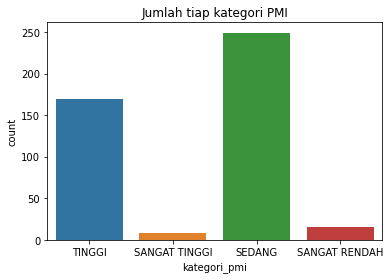

In [12]:
sns.countplot(x = "kategori_pmi", data = df_merged_all).set_title('Jumlah tiap kategori PMI')

Berdasarkan plot di atas, jumlah kategori PMI terbanyak (yaitu berjumlah 250) berada pada kategori SEDANG dengan range 60 < pmi < 70 : sedang. Kemudian yang kedua ialah range

<AxesSubplot:xlabel='jumlah_naik_haji'>

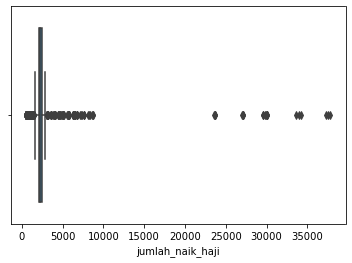

In [30]:
sns.boxplot(x="jumlah_naik_haji", data=df_merged_all)

## Persiapan Dataset

In [15]:
# Menghapus kolom yang terdapat tipe data string, agar dapat dibuat modelnya dengan naive bayes
df_merged_all = df_merged_all.drop(columns=['kepadatan_penduduk','melek_huruf_diatas15',
                                            'persen_penduduk_trampil_tik','persen_rumah_dgn_fasilitas_cuci_tangan_sabun'])
df_merged_all.head()

,prov,tahun,kategori_pmi,jumlah_naik_haji,pct_tdk_cukup_pangan,persen_anak_dengan_akte_lahir,persen_asupan_kalori_bawah_1400,pct_perempuan_managerial,persen_rumah_menyewa,persen_unmet_need_pelayanan_kesehatan,proporsi_hidup_dibawah_50_persen_median_pendapatan,proporsi_kerja_informal_nonpertanian,pct_perempuan_nikah,proporsi_rt_akses_layanan_dasar
0,ACEH,2022,TINGGI,2242.0,8.915,86.48,10.02,27.135,6.97,4.685,10.075,45.925,29.755,79.11
1,SUMATERA UTARA,2022,TINGGI,2242.0,8.915,86.48,10.02,27.135,6.97,4.685,10.075,45.925,29.755,79.11
2,SUMATERA BARAT,2022,TINGGI,2242.0,8.915,86.48,10.02,27.135,6.97,4.685,10.075,45.925,29.755,79.11
3,RIAU,2022,TINGGI,2242.0,8.915,86.48,10.02,27.135,6.97,4.685,10.075,45.925,29.755,79.11
4,JAMBI,2022,TINGGI,2242.0,8.915,86.48,10.02,27.135,6.97,4.685,10.075,45.925,29.755,79.11


In [17]:
# import library
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [18]:
# Y = (df.kategori_pmi) # Y = nama variabel,

# Pembuatan Model